In [11]:
import sys
import os as os
sys.path.append(os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt
from utils import ISTA, IST
import scipy.io as sio
from scipy import stats

In [12]:
def Localization_with_attacks(n, q, G, tau, lam, y):

    # Estimate x_tilda using ISTA
    lam_weights = np.concatenate((np.full(n, 10), np.full(q,20)))
    w = np.zeros(n+q)
    w_estimated, w_estimated_supp, iterations = ISTA(w, G, tau, lam * lam_weights, y)

    return w_estimated, w_estimated_supp, iterations

Regarding the estimated state vector, our results indicated the need for refinement, as we observed more than three non-zero elements, even though their values were low. In a real-world scenario, knowing the number of targets to localize is feasible, so we selected the top three non-zero elements from the estimated $x$ vector, setting the others to 0. This approach ensured that the estimated support was accurate.

In contrast, the attacked sensors were clearly identified without requiring any additional cleaning.

In [13]:
def task_3():

    sensor_coords = np.array([
        [80,  750],[100,  345],[70, 170],[190, 930],[170, 30],[240, 320],[260, 360],[260, 460],[350, 700],[370, 410],
        [400, 950],[330, 640],[410, 650],[550, 20],[620, 750],[760, 760],[650,  10],[660, 230],[710, 195],[870, 650],
        [920, 950],[930, 610],[960, 190],[970, 260],[970, 980]
    ])
    true_location = []
    true_location.append([22,35,86])
    cwd = os.getcwd()
    #original matrices
    mat = sio.loadmat(cwd + r'/../utils/localization.mat')

    A = mat['A']
    y = np.squeeze(mat['y'])
    D = mat['D']
    n = D.shape[1]
    q = D.shape[0]

    G = np.hstack((D, np.eye(q)))
    #normalize G
    G = stats.zscore(G, axis=0)

    tau = 1 / (np.linalg.norm(G, ord=2)**2) - 10**(-8)
    lam = 1
    
    w_estimated, w_estimated_supp, iterations = Localization_with_attacks(n, q, G, tau, lam, y)

    # Extract the estimated targets' location by taking the 3 greatest values of the first n elements of w_estimated
    estimated_targets_location = np.argsort(w_estimated[:n])[-3:]

    # Extract the estimated attacked vectors from the support of the last q eleemnts of w_estimated
    estimated_attacked_sensors = np.where(w_estimated[n:] != 0)[0]
    
    print("Estimated targets location: ", estimated_targets_location)
    print("Estimated attacked sensors: ", estimated_attacked_sensors)

    H = 10  # Grid's height (# celle)
    L = 10  # Grid's length (# celle)
    W = 100  # Cell's width (cm)

    room_grid = np.zeros((2, n))

    for i in range(n):
        room_grid[0, i] = W//2 + (i % L) * W
        room_grid[1, i] = W//2 + (i // L) * W

    # Plots
    plt.figure()
    plt.grid(True)

    # True targets plot
    plt.plot(room_grid[0, true_location], room_grid[1, true_location], 's', markersize=9, 
            markeredgecolor=np.array([40, 208, 220])/255, 
            markerfacecolor=np.array([40, 208, 220])/255)    
    # Estimated targets plot
    plt.plot(room_grid[0, estimated_targets_location], room_grid[1, estimated_targets_location], 'x', markersize=9, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor=np.array([255, 255, 255])/255)

    # Sensors plot
    plt.scatter(sensor_coords[:, 0], sensor_coords[:, 1], s=50, c='pink', alpha=0.5, label='Sensors')
    
    # Attacked sensors plot
    plt.plot(sensor_coords[estimated_attacked_sensors[0], 0], sensor_coords[estimated_attacked_sensors[0], 1], 'o', markersize=12, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor='none')
    plt.plot(sensor_coords[estimated_attacked_sensors[1], 0], sensor_coords[estimated_attacked_sensors[1], 1], 'o', markersize=12, 
            markeredgecolor=np.array([255, 0, 0])/255, 
            markerfacecolor='none')

    plt.xticks(np.arange(100, 1001, 100))
    plt.yticks(np.arange(100, 1001, 100))
    plt.xlabel('(cm)')
    plt.ylabel('(cm)')
    plt.axis([0, 1000, 0, 1000])
    plt.legend(['True Targets', 'Estimated Targets', 'Sensors', 'Attacked sensors'], loc='best')
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

Estimated targets location:  [35 22 86]
Estimated attacked sensors:  [11 15]


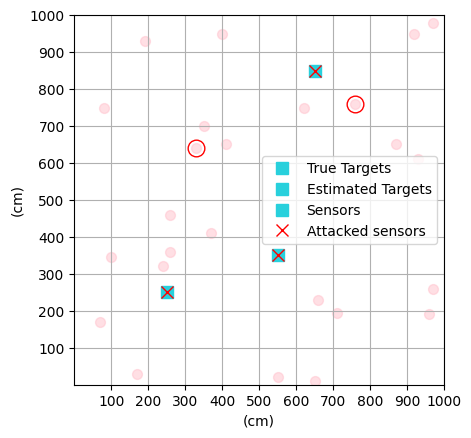

In [14]:
task_3()